<a href="https://colab.research.google.com/github/alexcassis/movie_recomendations/blob/master/evaluation_2_programmation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La présente analyse de données porte sur la scolarisation de la population québécoise, en se basant sur la Banque de données des statistiques officielles sur le Québec. Cette banque de données a été élaborée en collaboration avec plusieurs ministères et organismes partenaires, sous la coordination de l'Institut de la statistique du Québec. Les données recueillies permettent de connaître le niveau de scolarité de la population, soit le plus haut certificat, diplôme ou grade atteint par la personne. Les résultats sont présentés pour l'ensemble du Québec et par régions administratives, selon l'âge et le sexe des individus. Les informations recueillies dans cette analyse pourront être utiles pour mieux comprendre l'état de l'éducation et de la formation dans la province.


Nous avons extrait les données à partir de la Banque de données statistiques du Québec au lien suivant: 
https://bdso.gouv.qc.ca/pls/ken/ken2122_navig_niv_2.page_niv2?p_iden_tran=REPERQQEQ3102137957640651{p4*1&p_id_ss_domn=824

Nous avons décidé de comprarer le niveau de scolarité des hommes et des femmes au Québec depuis 1990. Pour commencer, nous avons procédé à nettoyer les données puisqu'il y avait 13 500 lignes et nous n'avions pas besoin de toutes les lignes et colonnes pour nos objectifs.

# **Tâche 1: Charger et nettoyer les données et les librairies**




In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time

In [3]:
import pandas as pd
import requests
from io import StringIO

url = 'https://test-aws-bucket-567.s3.amazonaws.com/Tableau_statistique.csv'

response = requests.get(url)
response.raise_for_status()  # Raise an exception if there's an error with the request

csv_data = response.content.decode('utf-8')

df = pd.read_csv(StringIO(csv_data), delimiter=';', header=1)




# read the CSV file into a pandas dataframe
#df = pd.read_csv('Tableau_statistique.csv', delimiter=';', header = 1)

df



,Élément statistique,1er niveau de détail,2ème niveau de détail,3ème niveau de détail,Territoire,Temps,Unité de mesure,Valeur numérique,Note
0,Plus haut niveau de diplomation selon le sexe ...,Total (Homme-femme),15 ans et plus,Total (Niveau de scolarité),Québec,1990.0,k,5457,NaN
1,Plus haut niveau de diplomation selon le sexe ...,Total (Homme-femme),15 ans et plus,Total (Niveau de scolarité),Québec,1991.0,k,5517,NaN
2,Plus haut niveau de diplomation selon le sexe ...,Total (Homme-femme),15 ans et plus,Total (Niveau de scolarité),Québec,1992.0,k,"5564,5",NaN
3,Plus haut niveau de diplomation selon le sexe ...,Total (Homme-femme),15 ans et plus,Total (Niveau de scolarité),Québec,1993.0,k,"5610,9",NaN
4,Plus haut niveau de diplomation selon le sexe ...,Total (Homme-femme),15 ans et plus,Total (Niveau de scolarité),Québec,1994.0,k,"5651,8",NaN
...,...,...,...,...,...,...,...,...,...
13496,Plus haut niveau de diplomation selon le sexe ...,Femme,65 ans et plus,..Diplôme ou certificat universitaire supérieu...,Québec,2016.0,%,"3,3",NaN
13497,Plus haut niveau de diplomation selon le sexe ...,Femme,65 ans et plus,..Diplôme ou certificat universitaire supérieu...,Québec,2017.0,%,"4,1",NaN
13498,Plus haut niveau de diplomation selon le sexe ...,Femme,65 ans et plus,..Diplôme ou certificat universitaire supérieu...,Québec,2018.0,%,"3,7",NaN
13499,Plus haut niveau de diplomation selon le sexe ...,Femme,65 ans et plus,..Diplôme ou certificat universitaire supérieu...,Québec,2019.0,%,"4,1",NaN


In [4]:
print(df.columns)


Index(['Élément statistique', '1er niveau de détail', '2ème niveau de détail',
       '3ème niveau de détail', 'Territoire', 'Temps', 'Unité de mesure',
       'Valeur numérique', 'Note'],
      dtype='object')


In [5]:
# drop the 'Élément statistique' column
df.drop('Élément statistique', axis=1, inplace=True)

# filter rows where "1er niveau de détail" contains "Total (Homme-femme)"
df = df[~df['1er niveau de détail'].str.contains('Total \(Homme-femme\)')]

# filter rows where "2ème niveau de détail" does not contain "15 ans et plus"
df = df[df['2ème niveau de détail'] == '15 ans et plus']

# drop the '2ème niveau de détail' column because the filter has been done
df.drop('2ème niveau de détail', axis=1, inplace=True)

# filter rows where "3ème niveau de détail" contains "Total (Niveau de scolarité)"
df = df[~df['3ème niveau de détail'].str.contains('Total \(Niveau de scolarité\)')]

# drop the 'Territoire' column
df.drop('Territoire', axis=1, inplace=True)

# filter rows where "Unité de mesure" is not "k"
df = df[df['Unité de mesure'] != 'k']

# drop the 'Unité de mesure' column since the filtering is complete
df.drop('Unité de mesure', axis=1, inplace=True)

# drop the 'Note' column
df.drop('Note', axis=1, inplace=True)



In [6]:
# using len() function
row_count = len(df)
print("Number of rows:", row_count)

Number of rows: 480


In [7]:
# reset the index
df.reset_index(drop=True, inplace=True)

# rename columns
df.rename(columns={
    '1er niveau de détail': 'Genre', 
    '3ème niveau de détail': 'Niveau', 
    'Temps': 'Année', 
    'Valeur numérique': '% du total'
}, inplace=True)

# rendre en pourcentage la colonne % du total
df["% du total"] = df["% du total"].str.replace(",", ".").astype(float) / 100


In [8]:
df

,Genre,Niveau,Année,% du total
0,Homme,Aucun diplôme,1990.0,0.431
1,Homme,Aucun diplôme,1991.0,0.421
2,Homme,Aucun diplôme,1992.0,0.406
3,Homme,Aucun diplôme,1993.0,0.392
4,Homme,Aucun diplôme,1994.0,0.397
...,...,...,...,...
475,Femme,..Diplôme ou certificat universitaire supérieu...,2015.0,0.067
476,Femme,..Diplôme ou certificat universitaire supérieu...,2016.0,0.067
477,Femme,..Diplôme ou certificat universitaire supérieu...,2017.0,0.074
478,Femme,..Diplôme ou certificat universitaire supérieu...,2018.0,0.076


# **Tâche 2: Séparer la cible des caractéristiques.**




In [9]:
df.head()

,Genre,Niveau,Année,% du total
0,Homme,Aucun diplôme,1990.0,0.431
1,Homme,Aucun diplôme,1991.0,0.421
2,Homme,Aucun diplôme,1992.0,0.406
3,Homme,Aucun diplôme,1993.0,0.392
4,Homme,Aucun diplôme,1994.0,0.397


In [10]:
Homme, Femme = df.Genre.value_counts()
print(Homme, Femme)

240 240


In [11]:
df.shape

(480, 4)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: >

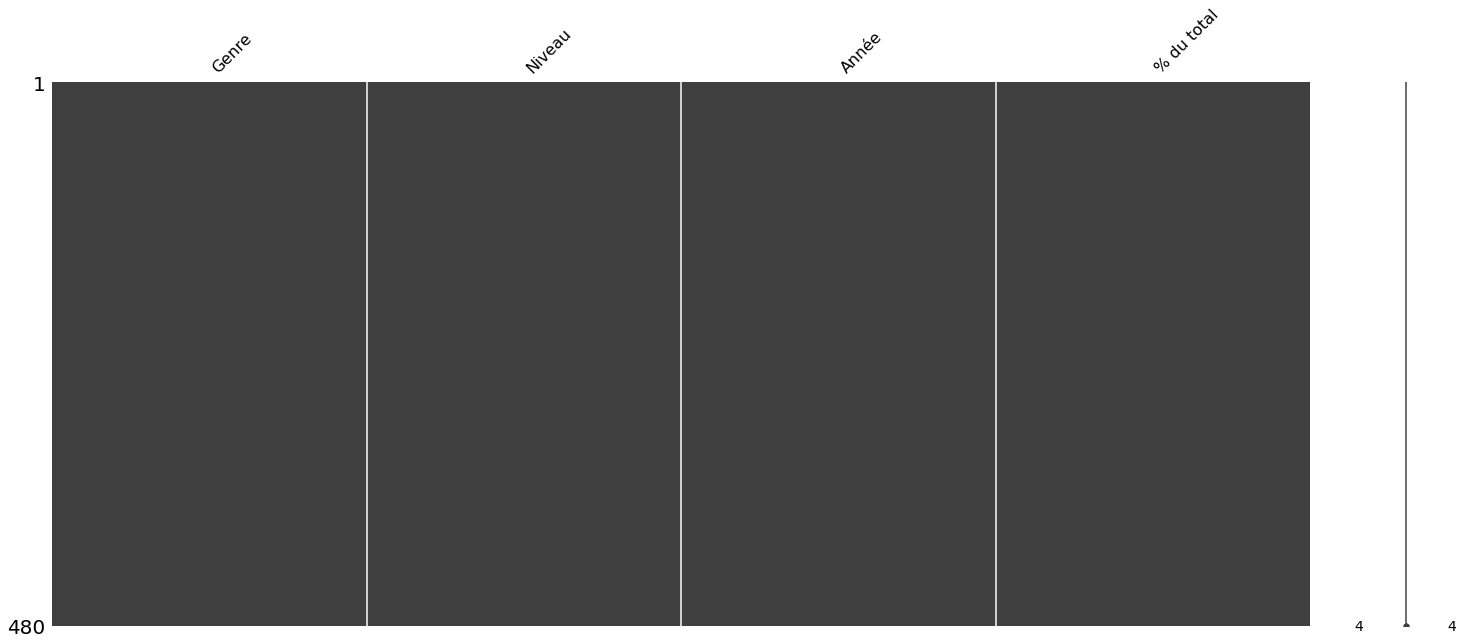

In [12]:
!pip install missingno
import missingno as msno
msno.matrix(df)

In [13]:
col = df.columns     
print(col)

Index(['Genre', 'Niveau', 'Année', '% du total'], dtype='object')


In [14]:
df['Diploma'] = df['Niveau'].apply(lambda x: 'Aucun diplôme' if x == 'Aucun diplôme' else 'Avec diplôme')


In [15]:
df

,Genre,Niveau,Année,% du total,Diploma
0,Homme,Aucun diplôme,1990.0,0.431,Aucun diplôme
1,Homme,Aucun diplôme,1991.0,0.421,Aucun diplôme
2,Homme,Aucun diplôme,1992.0,0.406,Aucun diplôme
3,Homme,Aucun diplôme,1993.0,0.392,Aucun diplôme
4,Homme,Aucun diplôme,1994.0,0.397,Aucun diplôme
...,...,...,...,...,...
475,Femme,..Diplôme ou certificat universitaire supérieu...,2015.0,0.067,Avec diplôme
476,Femme,..Diplôme ou certificat universitaire supérieu...,2016.0,0.067,Avec diplôme
477,Femme,..Diplôme ou certificat universitaire supérieu...,2017.0,0.074,Avec diplôme
478,Femme,..Diplôme ou certificat universitaire supérieu...,2018.0,0.076,Avec diplôme


### **Tâche 3 : Les visualisations des données**

In [16]:
unique_niveaux = df['Niveau'].unique()
print(unique_niveaux)


['Aucun diplôme' "Diplôme d'études secondaires"
 "Certificat ou diplôme d'une école de métier"
 "Certificat ou diplôme d'un collège ou cégep"
 'Certificat, diplôme ou grade universitaire'
 '..Certificat universitaire inférieur au baccalauréat' '..Baccalauréat'
 '..Diplôme ou certificat universitaire supérieur au baccalauréat']


In [17]:
df['Niveau abbr'] = df['Niveau'].replace({
    "Diplôme d'études secondaires": "DES",
    "Certificat ou diplôme d'une école de métier": "DEP",
    "Certificat ou diplôme d'un collège ou cégep": "DEC",
    "Certificat, diplôme ou grade universitaire": "Université",
    "..Certificat universitaire inférieur au baccalauréat": "Université",
    "..Baccalauréat": "Bacc.",
    "..Diplôme ou certificat universitaire supérieur au baccalauréat": "Post-grad"
})


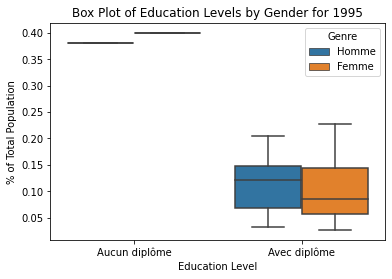

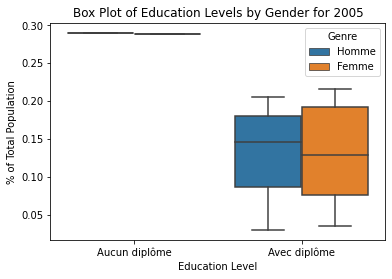

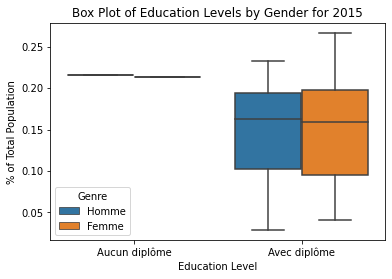

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a list of years to plot
years = [1995, 2005, 2015]

# loop through the years and create a box plot for each
for year in years:
    # filter the dataframe for the current year
    year_df = df[df["Année"] == year]
    
    # create the box plot using seaborn
    sns.boxplot(x="Diploma", y="% du total", hue="Genre", data=year_df)
    
    # set the title and axis labels
    plt.title(f"Box Plot of Education Levels by Gender for {year}")
    plt.xlabel("Education Level")
    plt.ylabel("% of Total Population")
    
    # show the plot
    plt.show()


In [20]:
df

,Genre,Niveau,Année,% du total,Diploma,Niveau abbr
0,Homme,Aucun diplôme,1990.0,0.431,Aucun diplôme,Aucun diplôme
1,Homme,Aucun diplôme,1991.0,0.421,Aucun diplôme,Aucun diplôme
2,Homme,Aucun diplôme,1992.0,0.406,Aucun diplôme,Aucun diplôme
3,Homme,Aucun diplôme,1993.0,0.392,Aucun diplôme,Aucun diplôme
4,Homme,Aucun diplôme,1994.0,0.397,Aucun diplôme,Aucun diplôme
...,...,...,...,...,...,...
475,Femme,..Diplôme ou certificat universitaire supérieu...,2015.0,0.067,Avec diplôme,Post-grad
476,Femme,..Diplôme ou certificat universitaire supérieu...,2016.0,0.067,Avec diplôme,Post-grad
477,Femme,..Diplôme ou certificat universitaire supérieu...,2017.0,0.074,Avec diplôme,Post-grad
478,Femme,..Diplôme ou certificat universitaire supérieu...,2018.0,0.076,Avec diplôme,Post-grad


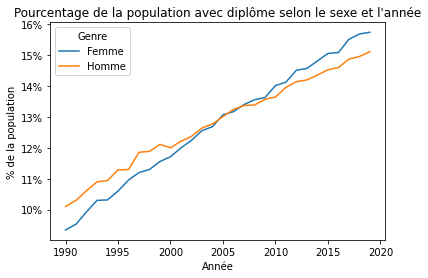

In [21]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# filter the dataframe to only include rows where "Niveau" is "Aucun diplôme"
aucun_df = df[df["Diploma"] == "Avec diplôme"]

# group by year and genre, and calculate the mean percentage of the total
grouped_df = aucun_df.groupby(["Année", "Genre"]).mean()

# unstack the "Genre" column to create separate columns for men and women
unstacked_df = grouped_df["% du total"].unstack()

# plot the unstacked dataframe using matplotlib
ax = unstacked_df.plot(kind="line")

# set the y-axis labels to display as percentages
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.title("Pourcentage de la population avec diplôme selon le sexe et l'année")
plt.xlabel("Année")
plt.ylabel("% de la population")
plt.show()


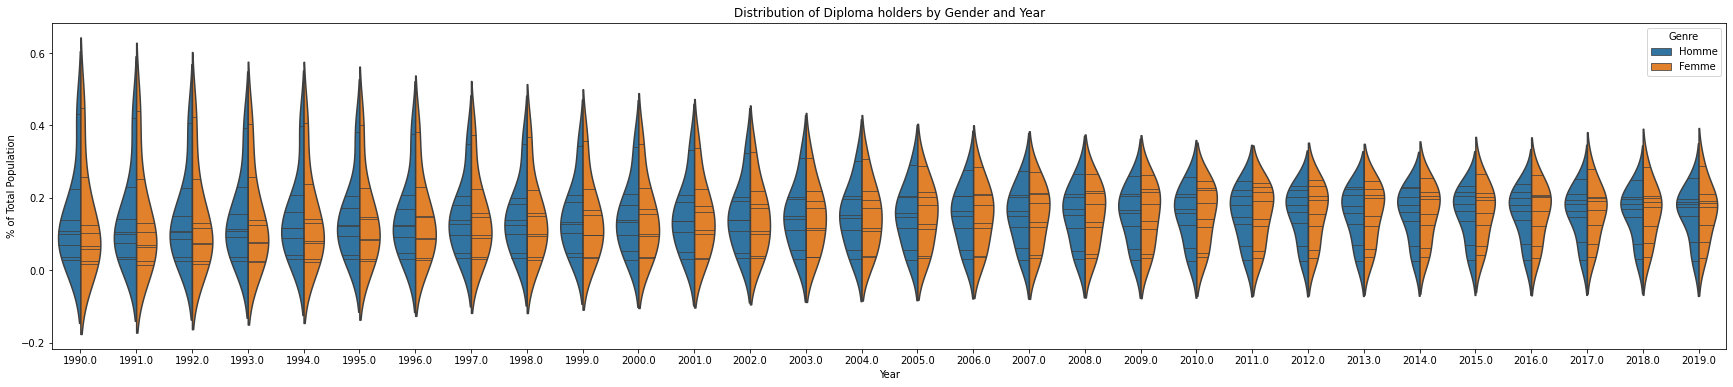

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# filter the dataframe for the desired variables
df_violin = df[["Genre", "Année", "% du total", "Diploma"]]
plt.figure(figsize=(30, 6))
# create the violin plot using seaborn
sns.violinplot(x="Année", y="% du total", hue="Genre", split=True, inner="stick", data=df_violin)

# set the title and axis labels
plt.title("Distribution of Diploma holders by Gender and Year")
plt.xlabel("Year")
plt.ylabel("% of Total Population")

# show the plot
plt.show()


In [23]:
df

,Genre,Niveau,Année,% du total,Diploma,Niveau abbr
0,Homme,Aucun diplôme,1990.0,0.431,Aucun diplôme,Aucun diplôme
1,Homme,Aucun diplôme,1991.0,0.421,Aucun diplôme,Aucun diplôme
2,Homme,Aucun diplôme,1992.0,0.406,Aucun diplôme,Aucun diplôme
3,Homme,Aucun diplôme,1993.0,0.392,Aucun diplôme,Aucun diplôme
4,Homme,Aucun diplôme,1994.0,0.397,Aucun diplôme,Aucun diplôme
...,...,...,...,...,...,...
475,Femme,..Diplôme ou certificat universitaire supérieu...,2015.0,0.067,Avec diplôme,Post-grad
476,Femme,..Diplôme ou certificat universitaire supérieu...,2016.0,0.067,Avec diplôme,Post-grad
477,Femme,..Diplôme ou certificat universitaire supérieu...,2017.0,0.074,Avec diplôme,Post-grad
478,Femme,..Diplôme ou certificat universitaire supérieu...,2018.0,0.076,Avec diplôme,Post-grad


In [24]:
lowest_value = df['% du total'].min()
highest_value = df['% du total'].max()

print("Lowest value in '% du total' column:", lowest_value)
print("Highest value in '% du total' column:", highest_value)

# To get the corresponding rows for the lowest and highest values, you can use idxmin() and idxmax():
lowest_value_index = df['% du total'].idxmin()
highest_value_index = df['% du total'].idxmax()

lowest_value_row = df.loc[lowest_value_index]
highest_value_row = df.loc[highest_value_index]

print("\nRow with the lowest value in '% du total' column:")
print(lowest_value_row)

print("\nRow with the highest value in '% du total' column:")
print(highest_value_row)


Lowest value in '% du total' column: 0.016
Highest value in '% du total' column: 0.449

Row with the lowest value in '% du total' column:
Genre                                                      Femme
Niveau         ..Diplôme ou certificat universitaire supérieu...
Année                                                     1991.0
% du total                                                 0.016
Diploma                                             Avec diplôme
Niveau abbr                                            Post-grad
Name: 451, dtype: object

Row with the highest value in '% du total' column:
Genre                  Femme
Niveau         Aucun diplôme
Année                 1990.0
% du total             0.449
Diploma        Aucun diplôme
Niveau abbr    Aucun diplôme
Name: 240, dtype: object


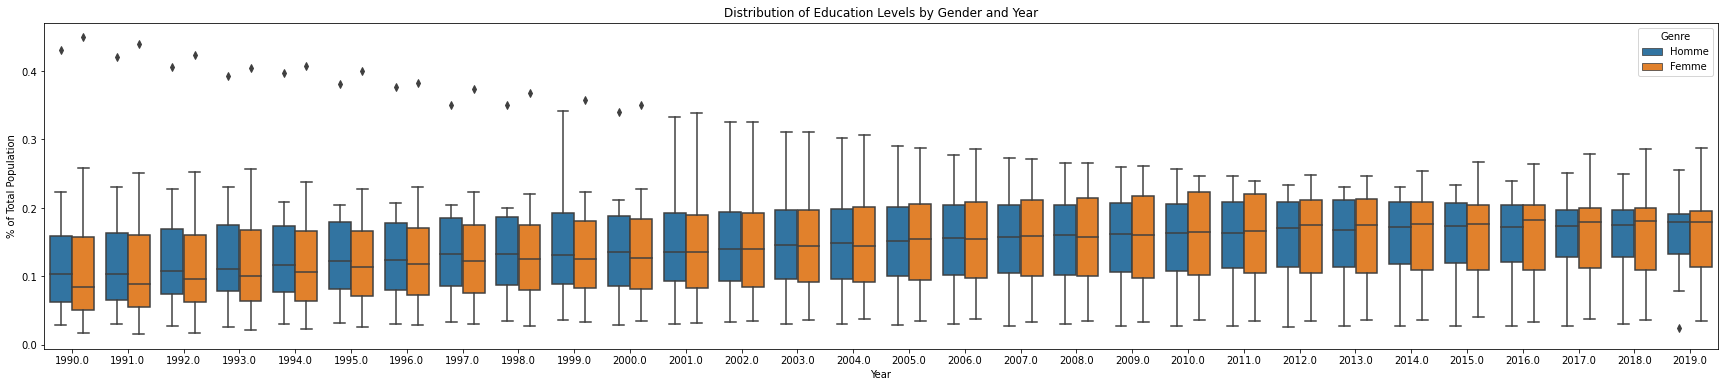

In [25]:
#box plot
import seaborn as sns
import matplotlib.pyplot as plt

# filter the dataframe for the desired variables
df_box = df[["Genre", "Année", "% du total", "Diploma"]]
plt.figure(figsize=(30, 6))
# create the box plot using seaborn
sns.boxplot(x="Année", y="% du total", hue="Genre", data=df_box)

# set the title and axis labels
plt.title("Distribution of Education Levels by Gender and Year")
plt.xlabel("Year")
plt.ylabel("% of Total Population")

# show the plot
plt.show()


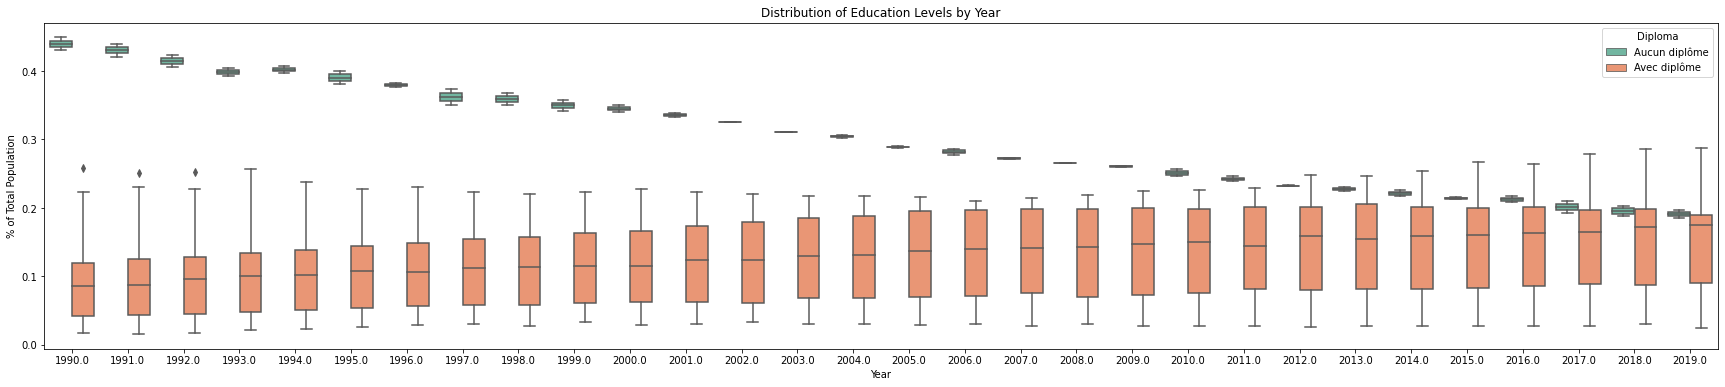

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# filter the dataframe for the desired variables
df_box = df[["Genre", "Année", "% du total", "Diploma"]]

# create a new figure with a specified size (width, height)
plt.figure(figsize=(30, 6))

# create the box plot using seaborn
sns.boxplot(x="Année", y="% du total", hue="Diploma", data=df_box, palette="Set2")

# set the title and axis labels
plt.title("Distribution of Education Levels by Year")
plt.xlabel("Year")
plt.ylabel("% of Total Population")

# show the plot
plt.show()


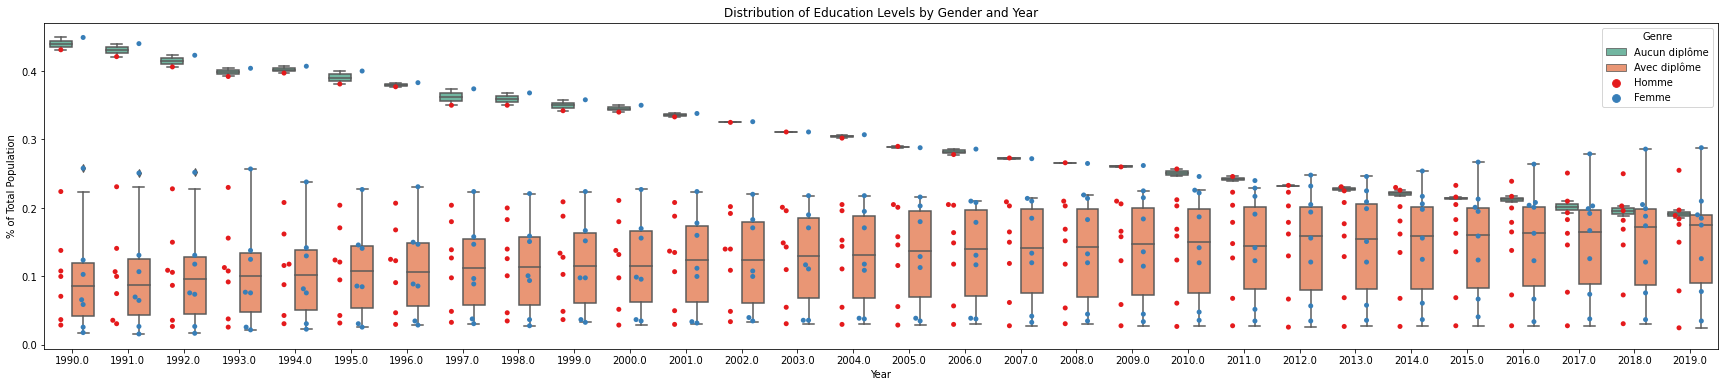

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# filter the dataframe for the desired variables
df_combined = df[["Genre", "Année", "% du total", "Diploma"]]

# create a new figure with a specified size (width, height)
plt.figure(figsize=(30, 6))

# create the box plot using seaborn with hue="Diploma"
sns.boxplot(x="Année", y="% du total", hue="Diploma", data=df_combined, palette="Set2")

# create the swarm plot using seaborn with hue="Genre" and dodge=True
sns.swarmplot(x="Année", y="% du total", hue="Genre", data=df_combined, palette="Set1", dodge=True)

# set the title and axis labels
plt.title("Distribution of Education Levels by Gender and Year")
plt.xlabel("Year")
plt.ylabel("% of Total Population")

# show the plot
plt.show()


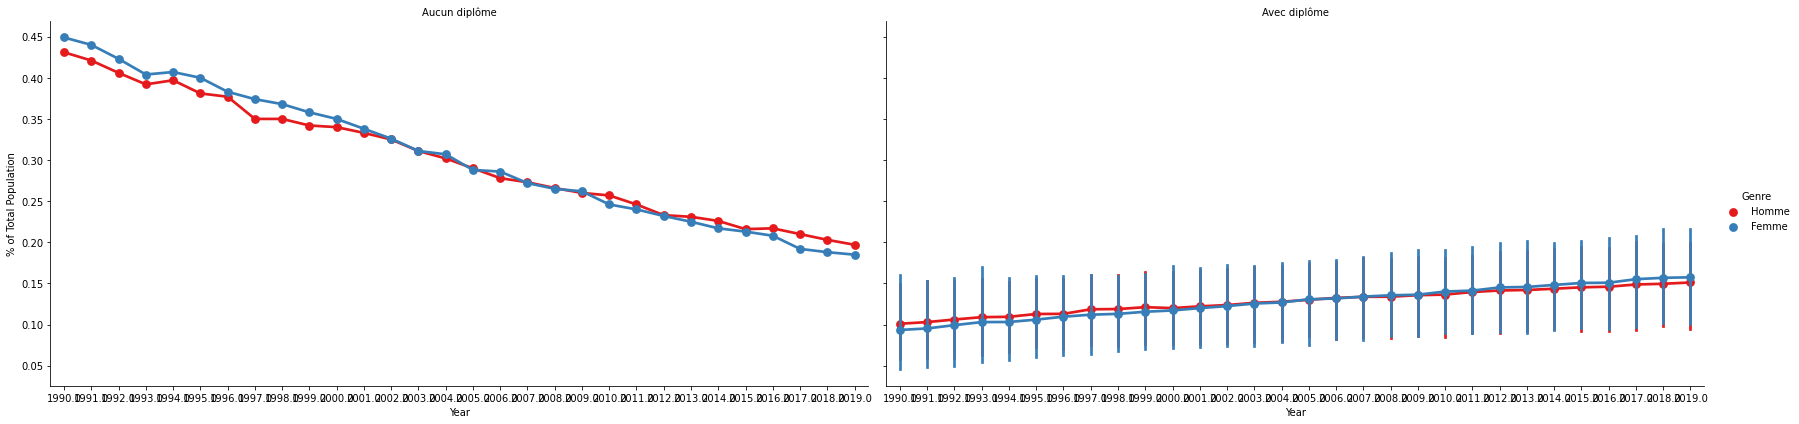

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# filter the dataframe for the desired variables
df_point = df[["Genre", "Année", "% du total", "Diploma"]]

# create a FacetGrid with separate plots for each diploma category
g = sns.FacetGrid(df_point, col="Diploma", height=6, aspect=2)
g.map(sns.pointplot, "Année", "% du total", "Genre", palette="Set1", order=sorted(df_point["Année"].unique()), hue_order=['Homme', 'Femme'])

# set the title and axis labels
g.set_titles("{col_name}")
g.set_axis_labels("Year", "% of Total Population")

# add a legend to the plot
g.add_legend(title="Genre")

# show the plot
plt.show()



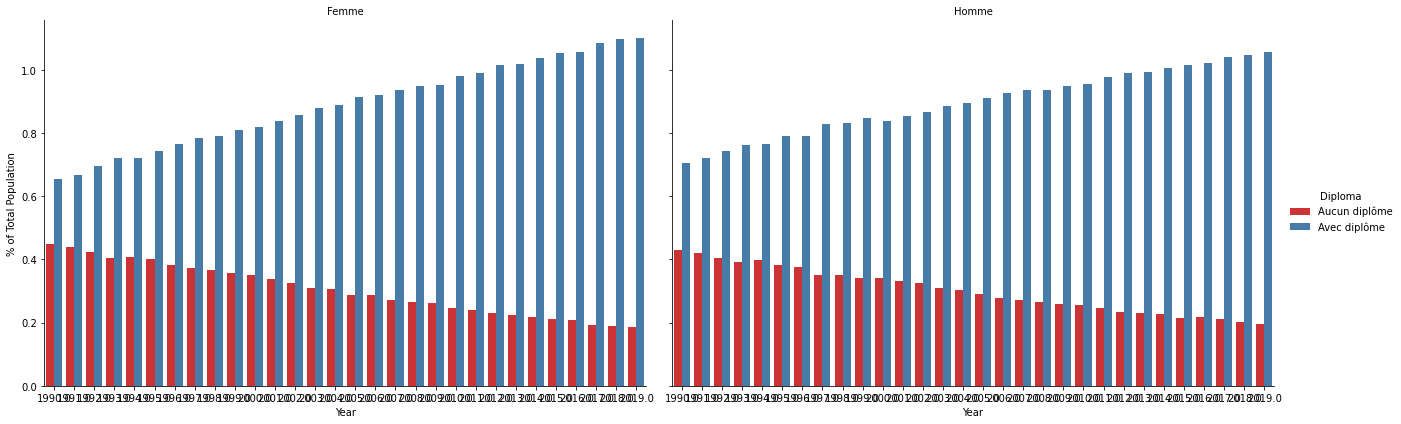

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the dataframe to get grouped bars
df_pivot = df.pivot_table(index=["Année", "Genre", "Diploma"], values="% du total", aggfunc="sum").reset_index()

# Plot the grouped bar chart
g = sns.catplot(x="Année", y="% du total", hue="Diploma", col="Genre", data=df_pivot, kind="bar", palette="Set1", height=6, aspect=1.5)

# Set the title and axis labels
g.set_titles("{col_name}")
g.set_axis_labels("Year", "% of Total Population")


# Show the plot
plt.show()
